In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc, rcParams
import scipy
import re

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [8]:
"""
Single sector (Sector 12) of WASP-17b (Model C) comparison with exoplanets: WASP-39b, HAT-P-26b, HAT-P-32b with single sectors

"""

'\nSingle sector (Sector 12) of WASP-17b (Model C) comparison with exoplanets: WASP-39b, HAT-P-26b, HAT-P-32b with single sectors\n\n'

In [9]:
df = pd.read_csv("parameters.csv")#, header=None)
df = df.set_index('Parameter')

In [10]:
df_ref_list = df.columns

df_T_0_list = df.loc['T_0']
df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
# df_R_list = df.loc['R'] #Planetary radius row
# df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']
df_sigma_list = df.loc['sigma']
df_rho_list = df.loc['rho']
df_transits_list = df.loc['transits']

T_0_list, T_0_ref_list = read_df_params(df_T_0_list, df_ref_list)
e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
# R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
# a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)
sigma_list, sigma_ref_list = read_df_params(df_sigma_list, df_ref_list)
rho_list, rho_ref_list = read_df_params(df_rho_list, df_ref_list)
transits_list, transits_ref_list = read_df_params(df_transits_list, df_ref_list)

In [18]:
type(transits_list)

numpy.ndarray

In [11]:
# Rp_errors = [WASP_17b_model_Rp_error, WASP_39b_model_Rp_error, HAT_P_26b_model_Rp_error, HAT_P_32b_model_Rp_error]
# Rp_errors_list = [max(abs(err1), abs(err2)) for err1, err2 in Rp_errors]

# transit_depth_list = np.power(Rp_list, 2)
# transit_depth_errors_list = (2 * np.divide(Rp_errors_list, Rp_list)) * transit_depth_list

0 (0.9753940792003075, 0.9907727797001153, 0.7627066512879661, 1.0)
1 (0.8869665513264129, 0.9555709342560553, 0.6656055363321799, 1.0)
2 (0.741361014994233, 0.893840830449827, 0.5868973471741638, 1.0)
3 (0.5651364859669358, 0.8175009611687812, 0.5119723183391004, 1.0)
4 (0.3724721261053441, 0.7283044982698962, 0.424559784698193, 1.0)
5 (0.21199538638985005, 0.6148096885813149, 0.327520184544406, 1.0)
6 (0.09527104959630911, 0.4840599769319493, 0.24835063437139562, 1.0)
7 (0.0, 0.378239138792772, 0.20384467512495194, 1.0)


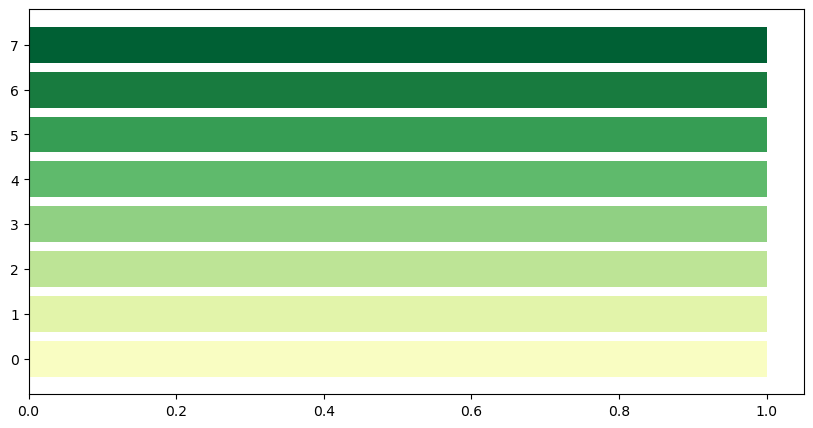

In [129]:
fig, ax = plt.subplots(1, figsize=(10, 5)) 
cmap = plt.get_cmap('YlGn')
counter = np.linspace(0.1,0.9, 8) #linspace(bottom of range, top of range, number of bins)
y_list = range(len(counter))
for count, y in zip(counter, y_list):
    ax.barh(y, 1, color=cmap(count), align='center')
    print(y, cmap(count))

plt.show()

HAT-P-26b rho 0.11912357198489529 0.047907160668278936
HAT-P-26b transit depth 0.00016801101926346246 3.399e-05
HAT-P-26b RsRp 0.0727840928103202 0.001963566097598249
HAT-P-26b transit depth 0.5297524166221304 0.19635660975982488 

(0.177423, 0.437527, 0.557565, 1.0)
WASP-17b rho 0.19044211595490584 0.027793919426255725
WASP-17b transit depth 0.0008084652860793481 7.816e-05
WASP-17b RsRp 0.12132331355382717 0.0009057218589828414
WASP-17b transit depth 1.4719346411680263 0.09057218589828414 

(0.798216, 0.280197, 0.469538, 1.0)
HAT-P-32b rho 0.5295657120072492 0.06476360063362813
HAT-P-32b transit depth 0.0007847154829236353 8.914e-05
HAT-P-32b RsRp 0.1495977792227567 0.00020492931499896394
HAT-P-32b transit depth 2.2379495548380652 0.020492931499896394 

(0.127568, 0.566949, 0.550556, 1.0)
WASP-39b rho 1.47932138724324 0.48585198588824985
WASP-39b transit depth 0.0011290750648156583 0.0002740331871066556
WASP-39b RsRp 0.14149026038025142 0.0012659907267314197
WASP-39b transit depth 2.0

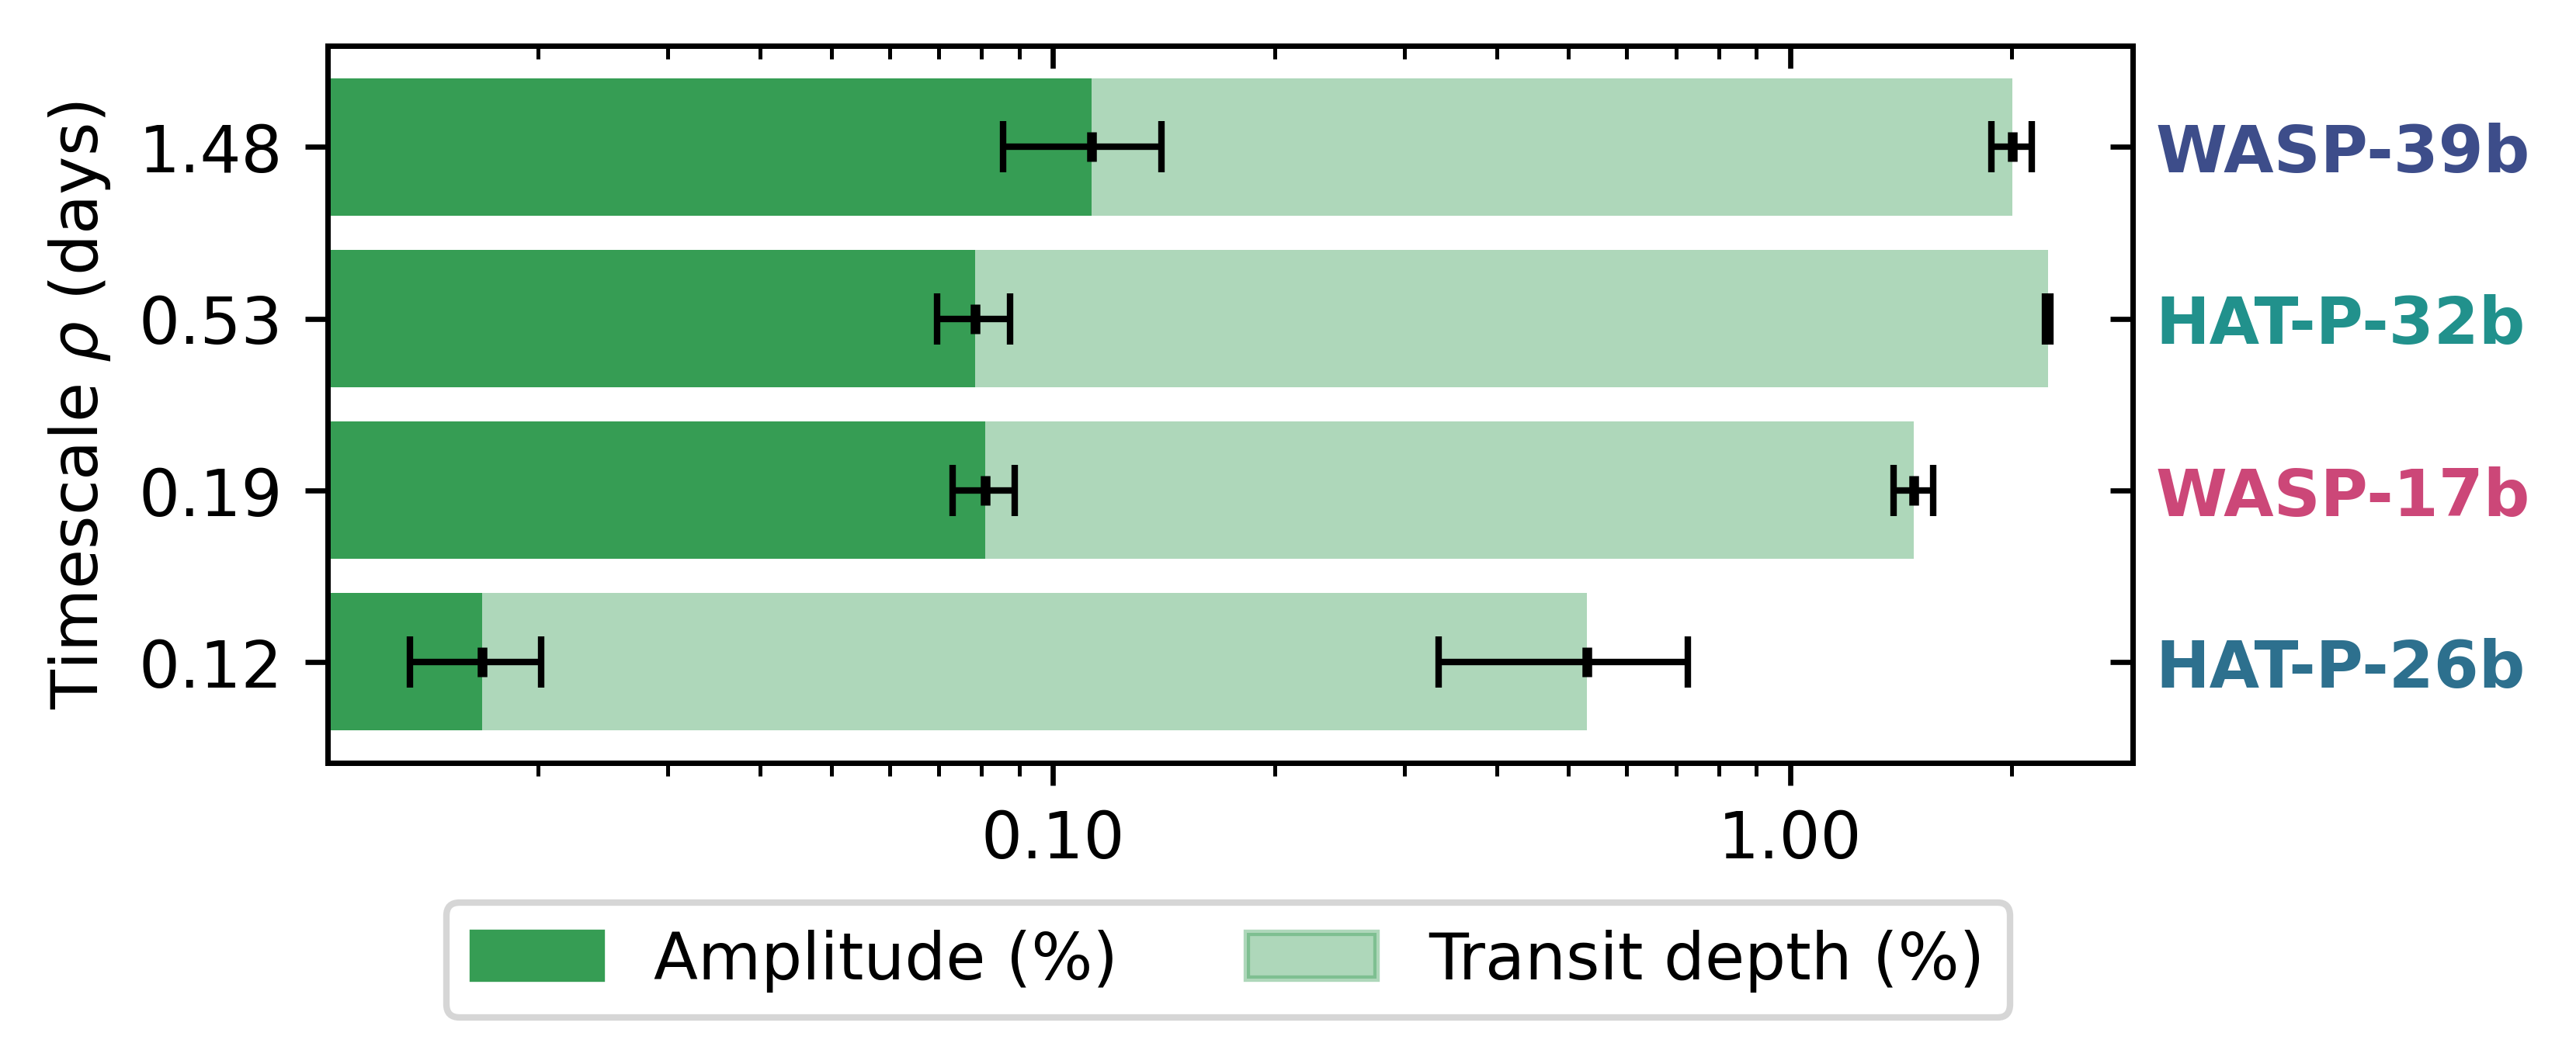

In [131]:
y_list = range(0, len(rho_ref_list))

fig, ax = plt.subplots(1, figsize=(5,2), dpi=600) 

labels_with_mu = []
author_label = []
colour_list = []
rho_obj = np.concatenate((rho_list, np.vstack(rho_ref_list)), axis=1, dtype=object)
# print(rho_ref_list)
rho_obj = rho_obj[rho_obj[:, 0].argsort()]
# print(rho_obj)

y = 0
for mu, upper, lower, author in rho_obj:
    sigma = max(abs(upper), abs(lower))
    print(author, "rho", mu, max(abs(upper), abs(lower)))

    amplitude_obj, author_none = read_df_params(np.array([df[author]['sigma']]), np.array([author]))
    amplitude_mu, amplitude_upper, amplitude_lower = amplitude_obj[0]
    print(author, "transit depth", amplitude_mu, max(abs(amplitude_upper), abs(amplitude_lower)))
    

    RpRs_obj, author_none = read_df_params(np.array([df[author]['RpRs']]), np.array([author]))
    RsRp_mu, RsRp_upper, RsRp_lower = RpRs_obj[0]
    print(author, "RsRp", RsRp_mu, max(abs(RsRp_upper), abs(RsRp_lower)))
    
    transit_depth = (RsRp_mu ** 2) * 100
    transit_depth_upper, transit_depth_lower = np.multiply(np.array([RsRp_upper, RsRp_lower]), 100)
    print(author, "transit depth", transit_depth, max(abs(transit_depth_upper), abs(transit_depth_lower)), "\n")
    
    # print()
    
    colour = tuple(map(float, df[author]['colour'][1:-1].split(', ')))
    print(colour)

    a = (0.21199538638985005, 0.6148096885813149, 0.327520184544406, 1.0)
    b = (0.21199538638985005, 0.6148096885813149, 0.327520184544406, 0.4)

    ax.scatter(amplitude_mu*100, y, color="black", marker="|", s=20, zorder=20)
    ax.barh(y, amplitude_mu*100, xerr=max(abs(amplitude_upper), abs(amplitude_lower))*100, color=a, height=0.8, align='center', zorder=10, error_kw=dict(ecolor='black', lw=1, capsize=4, capthick=1))
    
    ax.scatter(transit_depth, y, color="black", marker="|", s=20, zorder=20)
    ax.barh(y, transit_depth, xerr=max(abs(transit_depth_upper), abs(transit_depth_lower)), color=b, height=0.8, align='center', zorder=0, error_kw=dict(ecolor='black', lw=1, capsize=4, capthick=1))

    label = r"%.2f" % (mu)
    labels_with_mu.append(label)
    author_label.append(author)
    colour_list.append(colour)
    y += 1


ax.set_ylabel(r'Timescale $\rho$ (days)')
ax.set_yticks(y_list, labels=labels_with_mu)
# ax.set_xlabel(r'%')
ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))

ax.set_xscale('log')
ax.get_xaxis().set_major_formatter(tck.ScalarFormatter())


# Mirror y
axy = ax.twinx()
axy.set_ylim(ax.get_ylim())
axy.get_yaxis().set_ticklabels([])
axy.tick_params(which="both", direction="in")
axy.set_yticks(y_list, labels=author_label, weight='bold')

for ticklabel, tickcolor in zip(axy.get_yticklabels(), colour_list):
    ticklabel.set_color(tickcolor)

# Mirror x
axx = ax.twiny()
axx.set_xlim(ax.get_xlim())
axx.tick_params(which="both", direction="in")
axx.set_xscale('log')
axx.get_xaxis().set_ticklabels([])

# ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
# axx.xaxis.set_minor_locator(tck.AutoMinorLocator())

colors = {'Amplitude (%)': a, 'Transit depth (%)': b}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0), 1, 1, color=colors[label]) for label in labels]
ax.legend(handles, labels, ncol=2, bbox_to_anchor=(0.95, -0.15))

plt.show()